In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
#file_path = '/eos/home-k/kiwoznia/data/rodem/opde/kinga2_fullcalo_layers.pkl'
file_path_hadrons = '/eos/home-k/kiwoznia/data/rodem/opde/Feb24.pkl'
file_path_photons = '/eos/home-k/kiwoznia/data/rodem/opde/Feb24_photons.pkl'

In [56]:
df_photons = pd.read_pickle(file_path_photons)
df_hadrons = pd.read_pickle(file_path_hadrons)

In [57]:
df_photons.columns

Index(['true_energy', 'total_dep_energy', 'N_layers', 'N_active_layers',
       'N_sensors', 'sensor_energy', 'sensor_x', 'sensor_y', 'sensor_z',
       'sensor_dx', 'sensor_dy', 'sensor_dz', 'sensor_layer',
       'sensor_copy_number'],
      dtype='object')

In [58]:
df_photons = df_photons.drop(['sensor_x', 'sensor_y', 'sensor_z','sensor_dx', 'sensor_dy', 'sensor_dz','sensor_copy_number'],axis=1)

In [59]:
df_hadrons = df_hadrons.drop(['sensor_x', 'sensor_y', 'sensor_z','sensor_dx', 'sensor_dy', 'sensor_dz','sensor_copy_number'],axis=1)

In [60]:
min(df_photons['N_active_layers'])

30

In [61]:
N = len(df_photons)

In [62]:
df_photons['pid'] = 0
df_hadrons['pid'] = 1

In [63]:
e_sum_per_l_photons = sum([e for e in df_photons['sensor_energy']])/N

In [64]:
e_sum_per_l_hadrons = sum([e for e in df_hadrons['sensor_energy']])/N

In [45]:
layer_i = np.arange(1,len(e_sum_per_l_photons)+1)

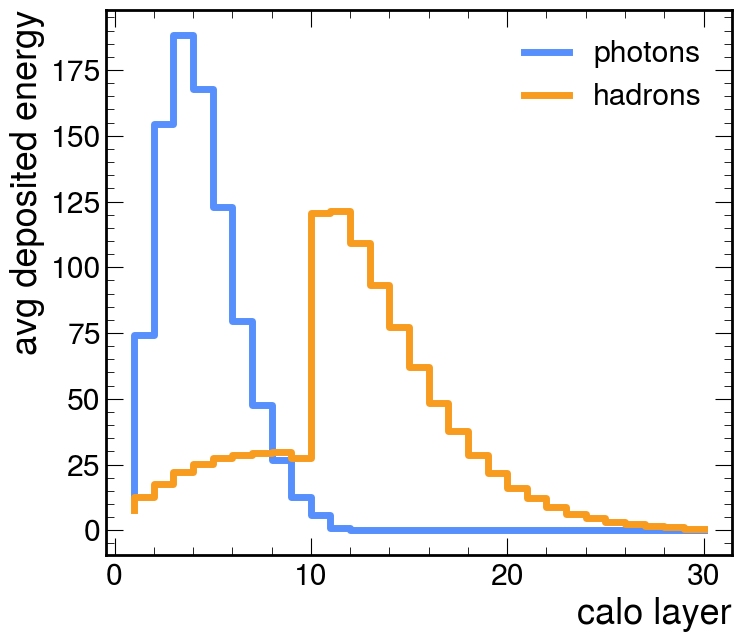

In [53]:
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.figure(figsize=(8,7))
plt.step(layer_i,e_sum_per_l_photons,label='photons',lw=5)
plt.step(layer_i,e_sum_per_l_hadrons,label='hadrons',lw=5)
plt.ylabel('avg deposited energy')
plt.xlabel('calo layer')
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
np.asarray(df_hadrons['sensor_energy']).shape

(50000, 30)

In [69]:
sens_e = np.asarray(df_hadrons['sensor_energy'])

In [77]:
l0 = sens_e[:,0]/1000
l10 = sens_e[:,10]/1000
l20 = sens_e[:,20]/1000
l30 = sens_e[:,-1]/1000

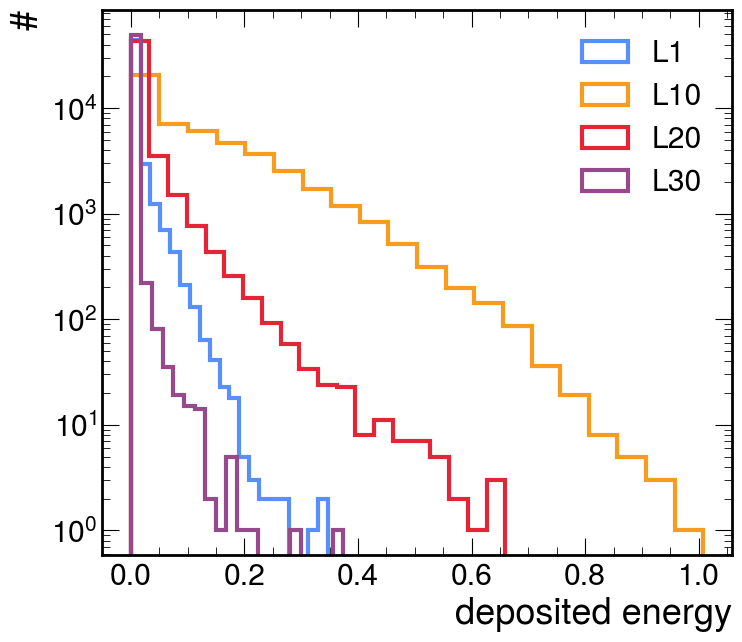

In [83]:
density=False
plt.figure(figsize=(8,7))
_ = plt.hist(l0,bins=20,histtype='step',label='L1',lw=3,density=density)
_ = plt.hist(l10,bins=20,histtype='step',label='L10',lw=3,density=density)
_ = plt.hist(l20,bins=20,histtype='step',label='L20',lw=3,density=density)
_ = plt.hist(l30,bins=20,histtype='step',label='L30',lw=3,density=density)
plt.ylabel('#')
plt.yscale('log')
plt.xlabel('deposited energy')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
df_all = pd.concat([df_photons, df_hadrons], ignore_index=True)

In [16]:
df_all

,true_energy,total_dep_energy,N_layers,N_active_layers,N_sensors,sensor_energy,sensor_x,sensor_y,sensor_z,sensor_dx,sensor_dy,sensor_dz,sensor_layer,sensor_copy_number,pid
0,76.636498,1381.468508,60,30,30,[22.60732568803541 153.3075740652412 178.30846...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,0
1,99.035305,1786.021181,60,30,30,[42.168713189169836 136.6696389212461 299.4323...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,0
2,28.956386,519.516692,60,30,30,[2.064107155237872 41.1083321806994 84.5675147...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,0
3,96.554431,1775.567918,60,30,30,[31.132204727159785 174.81585441405153 343.603...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,0
4,28.564323,510.078878,60,30,30,[0.09667021637053028 5.150795863056042 14.0271...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22.918417,368.753786,60,30,30,[1.0370277913771133 0.5761219132991755 1.25273...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,1
99996,63.224774,1385.120621,60,30,30,[0.0 0.0 0.0 0.0 7.527858417688549e-05 8.33845...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 10.0 ...,[1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33...,[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 1...,1
99997,2.393025,74.366224,60,30,30,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0...,[-959.0 -944.5 -930.0 -915.5 -901.0 -886.5 -87...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[500.0 500.0 500.0 500.0 500.0 500.0 500.0 500...,[2.0 2.0 2.0 2.0 2.0 2.0 2.0 2

In [93]:
df = df_photons[['true_energy','total_dep_energy','sensor_energy']]

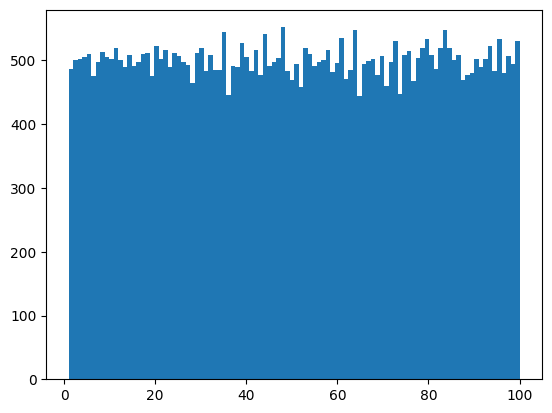

In [94]:
_ = plt.hist(df['true_energy'],bins=100)

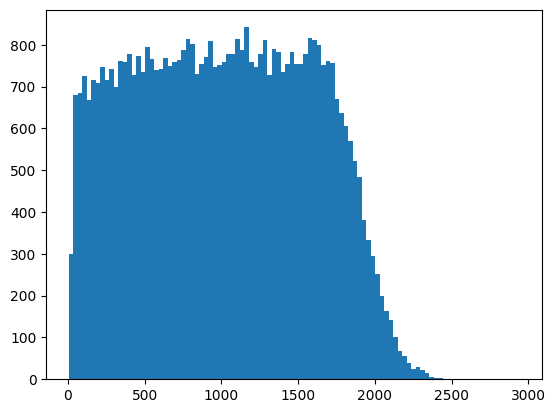

In [95]:
_ = plt.hist(df['total_dep_energy'],bins=100)

In [96]:
N_layers = 30
sums = np.asarray([[sum(x[:i]) for x in df['sensor_energy']] for i in range(1,N_layers+1)])
sum_col_names = [f'sum_{i}L' for i in range(1,N_layers+1)] 
df[sum_col_names] = sums.T

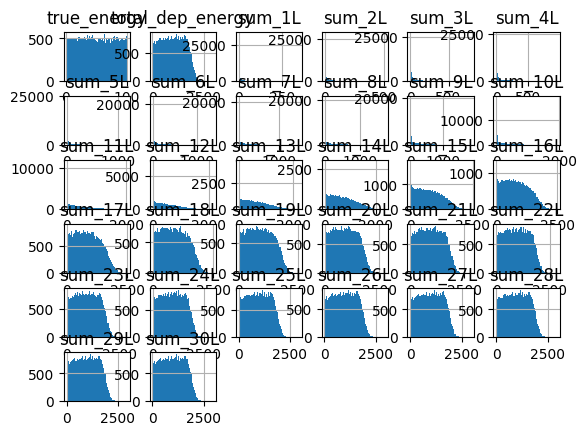

In [97]:
_ = df.hist(bins=100)

In [76]:
df.drop(['sensor_energy'],axis=1)

,true_energy,total_dep_energy,sum_1L,sum_2L,sum_3L,sum_4L,sum_5L,sum_6L,sum_7L,sum_8L,...,sum_21L,sum_22L,sum_23L,sum_24L,sum_25L,sum_26L,sum_27L,sum_28L,sum_29L,sum_30L
0,23.639745,539.739999,1.487555,14.236058,49.995042,104.940587,176.195525,239.766770,288.017408,337.008065,...,539.739999,539.739999,539.739999,539.739999,539.739999,539.739999,539.739999,539.739999,539.739999,539.739999
1,17.033645,496.503126,7.484470,15.600043,72.086635,119.729317,142.070170,163.159945,172.108279,183.186955,...,496.217244,496.503126,496.503126,496.503126,496.503126,496.503126,496.503126,496.503126,496.503126,496.503126
2,54.456665,1022.636447,0.175703,0.630826,1.714673,3.435473,8.167798,10.128951,12.619560,17.396454,...,1019.987904,1021.024025,1022.410328,1022.457704,1022.566691,1022.636447,1022.636447,1022.636447,1022.636447,1022.636447
3,21.413131,402.361337,0.000411,0.638091,0.638105,0.638163,0.829317,0.830100,1.265187,1.541575,...,401.684114,402.325639,402.360131,402.361337,402.361337,402.361337,402.361337,402.361337,402.361337,402.361337
4,147.576553,2374.858667,31.449769,44.941765,62.190159,104.227702,167.543216,343.576407,609.184930,925.070214,...,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667,2374.858667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2.472521,39.215800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.146223,39.215800,39.215800,39.215800,39.215800,39.215800,39.215800,39.215800,39.215800,39.215800
29996,16.261656,302.008870,27.929601,70.710905,113.050648,137.423350,156.296333,173.864570,191.941952,203.125095,...,302.008870,302.008870,302.008870,302.008870,302.008870,302.008870,302.008870,302.008870,302.008870,302.008870
29997,75.843001,1436.314438,18.318550,88.604089,216.790758,384.412207,507.520240,631.600283,767.214739,846.048806,...,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438,1436.314438
29998,111.381858,2222.370397,1.827231,2.614736,3.936394,4.268987,4.804163,5.566266,6.739742,7.482239,...,1910.477765,1954.270832,2002.197466,2069.126102,2121.457180,2159.601448,2215.803220,2219.206848,2222.177765,2222.370397


In [79]:
df=(df-df.min())/(df.max()-df.min())

/tmp/kiwoznia/ipykernel_2886599/1731750207.py:1: FutureWarning: <class 'awkward_pandas.array.AwkwardExtensionArray'>._reduce will require a `keepdims` parameter in the future
  df=(df-df.min())/(df.max()-df.min())


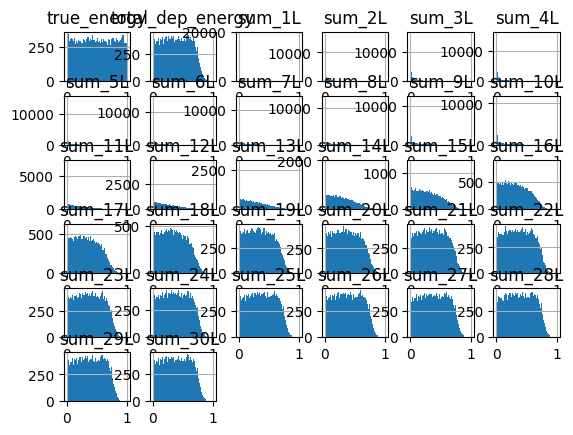

In [80]:
_ = df.hist(bins=100)

In [81]:
df.mean()

/tmp/kiwoznia/ipykernel_2886599/3698961737.py:1: FutureWarning: <class 'awkward_pandas.array.AwkwardExtensionArray'>._reduce will require a `keepdims` parameter in the future
  df.mean()


true_energy         0.499343
total_dep_energy    0.397029
sensor_energy       0.032805
sum_1L              0.022347
sum_2L              0.042013
sum_3L              0.047120
sum_4L              0.053391
sum_5L              0.063926
sum_6L              0.077170
sum_7L              0.090623
sum_8L              0.105125
sum_9L              0.115191
sum_10L             0.126375
sum_11L             0.173350
sum_12L             0.210354
sum_13L             0.250000
sum_14L             0.273190
sum_15L             0.297023
sum_16L             0.319148
sum_17L             0.335562
sum_18L             0.350288
sum_19L             0.362403
sum_20L             0.371809
sum_21L             0.378625
sum_22L             0.383576
sum_23L             0.387452
sum_24L             0.390411
sum_25L             0.392582
sum_26L             0.394154
sum_27L             0.395307
sum_28L             0.396150
sum_29L             0.396732
sum_30L             0.397029
dtype: float64

In [49]:
ff = pd.DataFrame([(1, 2, [1, 2, 3, 4]),  \
                    (1, 2, [5, 6, 7, 8])], \
                    columns = ['a', 'b', 'c'])

In [50]:
ff['c'].to_list()

[[1, 2, 3, 4], [5, 6, 7, 8]]

In [51]:
ff

,a,b,c
0,1,2,"[1, 2, 3, 4]"
1,1,2,"[5, 6, 7, 8]"


In [52]:
i = 2
[[sum(x[:i]) for x in ff['c']] for i in range(1,5)]

[[1, 5], [3, 11], [6, 18], [10, 26]]

In [53]:
sums = [[sum(x[:i]) for x in ff['c']] for i in range(1,5)]

In [54]:
arr = np.asarray(sums)

In [55]:
arr.T.shape

(2, 4)

In [56]:
ff[list('defg')] = arr.T

In [57]:
ff

,a,b,c,d,e,f,g
0,1,2,"[1, 2, 3, 4]",1,3,6,10
1,1,2,"[5, 6, 7, 8]",5,11,18,26


In [58]:
ff[[f'c{i}' for i in range(1,5)]] = ff['c'].to_list()

In [59]:
ff.values

array([[1, 2, list([1, 2, 3, 4]), 1, 3, 6, 10, 1, 2, 3, 4],
       [1, 2, list([5, 6, 7, 8]), 5, 11, 18, 26, 5, 6, 7, 8]],
      dtype=object)

In [39]:
from sklearn import preprocessing
ff_c = ff[[f'c{i}' for i in range(1,5)]]

In [40]:
ff_c

,c1,c2,c3,c4
0,1,2,3,4
1,5,6,7,8


In [43]:
ff_c.values

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [46]:
(ff_c - ff_c.mean())/ff_c.std()

,c1,c2,c3,c4
0,-0.707107,-0.707107,-0.707107,-0.707107
1,0.707107,0.707107,0.707107,0.707107


In [47]:
ff2 = pd.DataFrame(preprocessing.StandardScaler().fit_transform(ff_c.values),columns=ff_c.columns)

In [48]:
ff2

,c1,c2,c3,c4
0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0


In [54]:
ff['a'].to_numpy()[np.newaxis].T.shape

(2, 1)

In [59]:
arr.T.shape

(2, 4)

In [62]:
np.hstack([ff['a'].to_numpy()[np.newaxis].T, arr.T])

array([[ 1,  1,  3,  6, 10],
       [ 1,  5, 11, 18, 26]])

In [63]:
[f'sum_{i}L' for i in range(1,10+1)]

['sum_1L',
 'sum_2L',
 'sum_3L',
 'sum_4L',
 'sum_5L',
 'sum_6L',
 'sum_7L',
 'sum_8L',
 'sum_9L',
 'sum_10L']

In [42]:
bb[np.newaxis].T.shape

(7, 1)

In [69]:
df[:1000].to_pickle('/eos/home-k/kiwoznia/data/rodem/opde/kinga2_fullcalo_layers_1K.pkl')

In [23]:
ff['a'].to_numpy().[]

array([1, 1])

In [24]:
i = 0
for dd in df:
    print(dd)
    i = i+1
    if i > 5: break

true_energy
total_dep_energy
N_layers
N_active_layers
N_sensors
sensor_energy


In [24]:
i = 0
for dd in df:
    print(dd)
    i = i+1
    if i > 5: break

true_energy
total_dep_energy
N_layers
N_active_layers
N_sensors
sensor_energy


In [28]:
df.sum(df['sensor_energy'][:3])

TypeError: unhashable type: 'Series'

In [60]:
import datetime

In [61]:
datetime.datetime.now().strftime('%Y%m%d')

'20240223'